# 🏥 Análise Lixo Hospitalar 

## 📚 Importando bibliotecas que serão utilizadas

In [123]:
import glob
import pandas as pd

## 📖 Lendo o arquivo csv
- Importando e lendo os arquivos

In [124]:
HOSPITAL_TRASH_RECORD_DATA_PATH = glob.glob('data/*.csv')
hospital_trash_df = [pd.read_csv(file_path) for file_path in HOSPITAL_TRASH_RECORD_DATA_PATH]
hospital_trash_df

[   CONTROLE DIÁRIO DE PRODUÇÃO DE LIXO      Unnamed: 1  Unnamed: 2  \
 0                             1/1/2023             NaN         NaN   
 1                                SETOR              KG         NaN   
 2                                  NaN        CLASSE D         NaN   
 3                                  NaN  NÃO RECICLÁVEL         NaN   
 4                        Administração          12.80          NaN   
 5                          Ambulatório          18.70          NaN   
 6                             FArmácia             NaN         NaN   
 7                                  CME          18.60          NaN   
 8                   CECAE/Hemodinâmica             NaN         NaN   
 9                                CEROF             NaN         NaN   
 10                           Pediatria          28.30          NaN   
 11                         Obstetrícia          49.96          NaN   
 12                                 DIP          26.12          NaN   
 13   

## 🫧 Limpeza dos Dados
1. Removendo linhas indesejadas
2. Organizando as colunas 
3. Tratando os dados ausentes 
4. Corrigindo os tipos de dados

### 1. Removendo linhas indesejadas
- Analisando se todas possuem a palavra 'Nutrição' ou 'NUTRIÇÃO'
- Removendo as primeiras linhas até a palavra 'Nutrição' ou 'NUTRIÇÃO'

In [125]:
keyword = 'NÃO RECICLÁVEL' 

def verify_word_in_column(list_dataframe_for_keyword, keyword) -> bool:  
    list_dataframe_as_string = list_dataframe_for_keyword.to_string()
    if keyword in list_dataframe_as_string: 
        return True
    return False
    
all(verify_word_in_column(list_dataframe_for_keyword, keyword) for list_dataframe_for_keyword in hospital_trash_df)

True

In [126]:
def delete_rows_unwanted(list_dataframe_for_delete_rows, keyword): #-> 
    for index, row in list_dataframe_for_delete_rows.iterrows():
        if any(keyword in str(valor) for valor in row):
            return list_dataframe_for_delete_rows.iloc[index:]
    return list_dataframe_for_delete_rows

hospital_trash_df = [delete_rows_unwanted(list_dataframe_for_delete_rows, keyword) for list_dataframe_for_delete_rows in hospital_trash_df]     
hospital_trash_df

[   CONTROLE DIÁRIO DE PRODUÇÃO DE LIXO      Unnamed: 1  Unnamed: 2  \
 3                                  NaN  NÃO RECICLÁVEL         NaN   
 4                        Administração          12.80          NaN   
 5                          Ambulatório          18.70          NaN   
 6                             FArmácia             NaN         NaN   
 7                                  CME          18.60          NaN   
 8                   CECAE/Hemodinâmica             NaN         NaN   
 9                                CEROF             NaN         NaN   
 10                           Pediatria          28.30          NaN   
 11                         Obstetrícia          49.96          NaN   
 12                                 DIP          26.12          NaN   
 13                                 CCA          27.30          NaN   
 14                                 CMA          29.84          NaN   
 15                                 CMB             NaN         NaN   
 16   

### 2. Organização de colunas
- Concatenando os dataframes usando números para simbolizar cada mês
- Renomeando colunas para nomes descritivos

In [127]:
hospital_trash_df = pd.concat(hospital_trash_df, keys=['01-2023', '02-2023', '02-2022', '03-2022', '04-2022', '08-2022', '07-2022', '06-2022', '05-2022', '10-2022', '09-2022', '12-2022'], verify_integrity=True)
hospital_trash_df

CONTROLE DIÁRIO DE PRODUÇÃO DE LIXO      Unnamed: 1  Unnamed: 2  \
01-2023 3                                  NaN  NÃO RECICLÁVEL         NaN   
        4                        Administração          12.80          NaN   
        5                          Ambulatório          18.70          NaN   
        6                             FArmácia             NaN         NaN   
        7                                  CME          18.60          NaN   
...                                        ...             ...         ...   
12-2022 21                                 NaN             NaN         NaN   
        22                                 NaN             NaN         NaN   
        23                                 NaN             NaN         NaN   
        24                                 NaN             NaN         NaN   
        25                               TOTAL         529.59          NaN   

            Unnamed: 3  Unnamed: 4  Unnamed: 5 Unnamed: 6  Unnamed: 7  \
01-2023 3          NaN         NaN  RECICLÁVEL        NaN         NaN   
        4          NaN         NaN         NaN        NaN         NaN   
        5          NaN         NaN         NaN        NaN         NaN   
        6          NaN         NaN         NaN        NaN         NaN   
        7          NaN         NaN         NaN        NaN         NaN   
...                ...         ...         ...        ...         ...   
12-2022 21         NaN         NaN         NaN        NaN         NaN   
        22         NaN         NaN         NaN        NaN         NaN   
        23         NaN         NaN         NaN        NaN         NaN   
        24         NaN         NaN         NaN        NaN         NaN   
        25         NaN         NaN         NaN     36.15          NaN   

           Unnamed: 8  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
01-2023 3         NaN         NaN         NaN         NaN         NaN   
        4         NaN         NaN         NaN         NaN         NaN   
        5       0.20          NaN         NaN         NaN         NaN   
        6         NaN         NaN         NaN         NaN         NaN   
        7       0.40          NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
12-2022 21        NaN         NaN         NaN         NaN         NaN   
        22        NaN         NaN         NaN         NaN         NaN   
        23        NaN         NaN         NaN         NaN         NaN   
        24        NaN         NaN         NaN         NaN         NaN   
        25    162.15          NaN         NaN       5.65          NaN   

           Unnamed: 13  
01-2023 3          NaN  
        4          NaN  
        5          NaN  
        6          NaN  
        7          NaN  
...                ...  
12-2022 21         NaN  
        22         NaN  
        23         NaN  
        24         NaN  
        25        -     

[249 rows x 14 columns]

In [128]:
new_names_columns = ['SETOR',
                    'Classe_D-Nao_Reciclavel','Classe_D-Nao_Reciclavel', 'Classe_D-Nao_Reciclavel', 'Classe_D-Nao_Reciclavel',
                    'Classe_D-Reciclavel','Classe_D-Reciclavel','Classe_D-Reciclavel', 
                    'Classe_A (Infectante)', 'Classe_A (Infectante)', 
                    'Classe_E (Perfuro_Cortante)', 'Classe_E (Perfuro_Cortante)', 
                    'Classe_B (Medicamentos)', 'Classe_B (Medicamentos)']

hospital_trash_df.columns = new_names_columns
hospital_trash_df

SETOR  Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
01-2023 3             NaN           NÃO RECICLÁVEL                      NaN   
        4   Administração                   12.80                       NaN   
        5     Ambulatório                   18.70                       NaN   
        6        FArmácia                      NaN                      NaN   
        7             CME                   18.60                       NaN   
...                   ...                      ...                      ...   
12-2022 21            NaN                      NaN                      NaN   
        22            NaN                      NaN                      NaN   
        23            NaN                      NaN                      NaN   
        24            NaN                      NaN                      NaN   
        25          TOTAL                  529.59                       NaN   

            Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
01-2023 3                       NaN                      NaN   
        4                       NaN                      NaN   
        5                       NaN                      NaN   
        6                       NaN                      NaN   
        7                       NaN                      NaN   
...                             ...                      ...   
12-2022 21                      NaN                      NaN   
        22                      NaN                      NaN   
        23                      NaN                      NaN   
        24                      NaN                      NaN   
        25                      NaN                      NaN   

            Classe_D-Reciclavel  Classe_D-Reciclavel  Classe_D-Reciclavel  \
01-2023 3            RECICLÁVEL                  NaN                  NaN   
        4                   NaN                  NaN                  NaN   
        5                   NaN                  NaN                  NaN   
        6                   NaN                  NaN                  NaN   
        7                   NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
12-2022 21                  NaN                  NaN                  NaN   
        22                  NaN                  NaN                  NaN   
        23                  NaN                  NaN                  NaN   
        24                  NaN                  NaN                  NaN   
        25                  NaN               36.15                   NaN   

            Classe_A (Infectante)  Classe_A (Infectante)  \
01-2023 3                     NaN                    NaN   
        4                     NaN                    NaN   
        5                   0.20                     NaN   
        6                     NaN                    NaN   
        7                   0.40                     NaN   
...                           ...                    ...   
12-2022 21                    NaN                    NaN   
        22                    NaN                    NaN   
        23                    NaN                    NaN   
        24                    NaN                    NaN   
        25                162.15                     NaN   

           Classe_E (Perfuro_Cortante) Classe_E (Perfuro_Cortante)  \
01-2023 3                          NaN                         NaN   
        4                          NaN                         NaN   
        5                          NaN                         NaN   
        6                          NaN                         NaN   
        7                          NaN                         NaN   
...                                ...                         ...   
12-2022 21                         NaN                         NaN   
        22                         NaN                         NaN   
        23                

### 3. Tratamento de Dados Ausentes
- Identificando dados ausentes

In [129]:
hospital_trash_df.isnull().sum()

SETOR                           19
Classe_D-Nao_Reciclavel         65
Classe_D-Nao_Reciclavel        225
Classe_D-Nao_Reciclavel        249
Classe_D-Nao_Reciclavel        249
Classe_D-Reciclavel            215
Classe_D-Reciclavel            235
Classe_D-Reciclavel            249
Classe_A (Infectante)          105
Classe_A (Infectante)          237
Classe_E (Perfuro_Cortante)    237
Classe_E (Perfuro_Cortante)    247
Classe_B (Medicamentos)        238
Classe_B (Medicamentos)        248
dtype: int64

In [130]:
hospital_trash_df.isnull()

SETOR  Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
01-2023 3    True                    False                     True   
        4   False                    False                     True   
        5   False                    False                     True   
        6   False                     True                     True   
        7   False                    False                     True   
...           ...                      ...                      ...   
12-2022 21   True                     True                     True   
        22   True                     True                     True   
        23   True                     True                     True   
        24   True                     True                     True   
        25  False                    False                     True   

            Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
01-2023 3                      True                     True   
        4                      True                     True   
        5                      True                     True   
        6                      True                     True   
        7                      True                     True   
...                             ...                      ...   
12-2022 21                     True                     True   
        22                     True                     True   
        23                     True                     True   
        24                     True                     True   
        25                     True                     True   

            Classe_D-Reciclavel  Classe_D-Reciclavel  Classe_D-Reciclavel  \
01-2023 3                 False                 True                 True   
        4                  True                 True                 True   
        5                  True                 True                 True   
        6                  True                 True                 True   
        7                  True                 True                 True   
...                         ...                  ...                  ...   
12-2022 21                 True                 True                 True   
        22                 True                 True                 True   
        23                 True                 True                 True   
        24                 True                 True                 True   
        25                 True                False                 True   

            Classe_A (Infectante)  Classe_A (Infectante)  \
01-2023 3                    True                   True   
        4                    True                   True   
        5                   False                   True   
        6                    True                   True   
        7                   False                   True   
...                           ...                    ...   
12-2022 21                   True                   True   
        22                   True                   True   
        23                   True                   True   
        24                   True                   True   
        25                  False                   True   

            Classe_E (Perfuro_Cortante)  Classe_E (Perfuro_Cortante)  \
01-2023 3                          True                         True   
        4                          True                         True   
        5                          True                         True   
        6                          True                         True   
        7                          True                         True   
...                                 ...                          ...   
12-2022 21                         True                         True   
        22                         True                         True   
        23                         True                         True   
        24              

### 4. Identificação dos Tipos de Dados
- Identificando o tipo de dados de cada coluna
- Convertendo o tipo de dados para numéricos em quase todas as colunas

In [131]:
hospital_trash_df.dtypes

SETOR                           object
Classe_D-Nao_Reciclavel         object
Classe_D-Nao_Reciclavel        float64
Classe_D-Nao_Reciclavel        float64
Classe_D-Nao_Reciclavel        float64
Classe_D-Reciclavel             object
Classe_D-Reciclavel             object
Classe_D-Reciclavel            float64
Classe_A (Infectante)           object
Classe_A (Infectante)          float64
Classe_E (Perfuro_Cortante)     object
Classe_E (Perfuro_Cortante)     object
Classe_B (Medicamentos)         object
Classe_B (Medicamentos)         object
dtype: object

In [133]:
for column in hospital_trash_df[column]:
    if column != ['SETOR']:
        hospital_trash_df[column] = hospital_trash_df[column].astype('float64')
hospital_trash_df.info()

KeyError: nan

## 📈 Séries Temporais
1. Aprimorando o DataFrame
2. Trabalhando com datas
3. Selecionando os valores

### 1. Aprimorando o DataFrame
- Resetando os indexes
- Nomeando a coluna dos meses 

In [ ]:
hospital_trash_df = hospital_trash_df.reset_index()
hospital_trash_df

,level_0,level_1,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A (Infectante),Classe_A (Infectante),Classe_E (Perfuro_Cortante),Classe_E (Perfuro_Cortante),Classe_B (Medicamentos),Classe_B (Medicamentos)
0,01-2023,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-2023,4,NaN,12.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-2023,5,NaN,18.70,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN
3,01-2023,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-2023,7,NaN,18.60,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,12-2022,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,12-2022,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,12-2022,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,12-2022,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
hospital_trash_df = hospital_trash_df.rename(columns={'level_0': 'Mes'}).drop('level_1', axis=1)
hospital_trash_df

,Mes,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A (Infectante),Classe_A (Infectante),Classe_E (Perfuro_Cortante),Classe_E (Perfuro_Cortante),Classe_B (Medicamentos),Classe_B (Medicamentos)
0,01-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-2023,NaN,12.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-2023,NaN,18.70,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN
3,01-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-2023,NaN,18.60,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Trabalhando com datas 
- Analisando o tipo de cada coluna
- Mudando a coluna `Mes` para o tipo `datetime` para elaboração das séries temporais
- Tranformando a coluna `Mes` para uma coluna indexada

In [ ]:
hospital_trash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Mes                          249 non-null    object 
 1   SETOR                        0 non-null      object 
 2   Classe_D-Nao_Reciclavel      171 non-null    float64
 3   Classe_D-Nao_Reciclavel      24 non-null     float64
 4   Classe_D-Nao_Reciclavel      0 non-null      float64
 5   Classe_D-Nao_Reciclavel      0 non-null      float64
 6   Classe_D-Reciclavel          13 non-null     float64
 7   Classe_D-Reciclavel          13 non-null     float64
 8   Classe_D-Reciclavel          0 non-null      float64
 9   Classe_A (Infectante)        140 non-null    float64
 10  Classe_A (Infectante)        12 non-null     float64
 11  Classe_E (Perfuro_Cortante)  2 non-null      float64
 12  Classe_E (Perfuro_Cortante)  2 non-null      float64
 13  Classe_B (Medicament

In [ ]:
hospital_trash_df.Mes = pd.to_datetime(hospital_trash_df.Mes)
hospital_trash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Mes                          249 non-null    datetime64[ns]
 1   SETOR                        0 non-null      object        
 2   Classe_D-Nao_Reciclavel      171 non-null    float64       
 3   Classe_D-Nao_Reciclavel      24 non-null     float64       
 4   Classe_D-Nao_Reciclavel      0 non-null      float64       
 5   Classe_D-Nao_Reciclavel      0 non-null      float64       
 6   Classe_D-Reciclavel          13 non-null     float64       
 7   Classe_D-Reciclavel          13 non-null     float64       
 8   Classe_D-Reciclavel          0 non-null      float64       
 9   Classe_A (Infectante)        140 non-null    float64       
 10  Classe_A (Infectante)        12 non-null     float64       
 11  Classe_E (Perfuro_Cortante)  2 non-null      

C:\Users\gabri\AppData\Local\Temp\ipykernel_22616\326356548.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hospital_trash_df.Mes = pd.to_datetime(hospital_trash_df.Mes)


In [ ]:
hospital_trash_df.set_index('Mes', inplace=True)
hospital_trash_df

,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A (Infectante),Classe_A (Infectante),Classe_E (Perfuro_Cortante),Classe_E (Perfuro_Cortante),Classe_B (Medicamentos),Classe_B (Medicamentos)
Mes,,,,,,,,,,,,,,
2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,NaN,12.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,NaN,18.70,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,NaN,18.60,NaN,NaN,NaN,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Selecionando os valores
- Separando a última linha de cada mês pois é a que possui o total 
- Plotando a série temporal

In [ ]:
last_line_month_df = hospital_trash_df.groupby('Mes').last()
last_line_month_df

,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A (Infectante),Classe_A (Infectante),Classe_E (Perfuro_Cortante),Classe_E (Perfuro_Cortante),Classe_B (Medicamentos),Classe_B (Medicamentos)
Mes,,,,,,,,,,,,,,
2022-02-01,None,580.61,NaN,NaN,NaN,NaN,NaN,NaN,144.25,NaN,NaN,NaN,NaN,NaN
2022-03-01,None,334.56,NaN,NaN,NaN,NaN,NaN,NaN,72.50,1.90,NaN,NaN,NaN,NaN
2022-04-01,None,352.25,NaN,NaN,NaN,NaN,NaN,NaN,193.90,NaN,NaN,NaN,NaN,NaN
2022-05-01,None,209.90,NaN,NaN,NaN,NaN,NaN,NaN,123.85,NaN,NaN,NaN,NaN,NaN
2022-06-01,None,594.77,12.8,NaN,NaN,NaN,NaN,NaN,178.44,6.00,NaN,NaN,NaN,NaN
2022-07-01,None,825.76,19.7,NaN,NaN,175.6,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,None,626.79,19.7,NaN,NaN,NaN,NaN,NaN,172.60,5.25,NaN,NaN,NaN,NaN
2022-09-01,None,626.79,19.7,NaN,NaN,NaN,NaN,NaN,172.60,5.25,NaN,NaN,NaN,NaN
2022-10-01,None,626.79,19.7,NaN,NaN,NaN,NaN,NaN,172.60,5.25,NaN,NaN,NaN,NaN


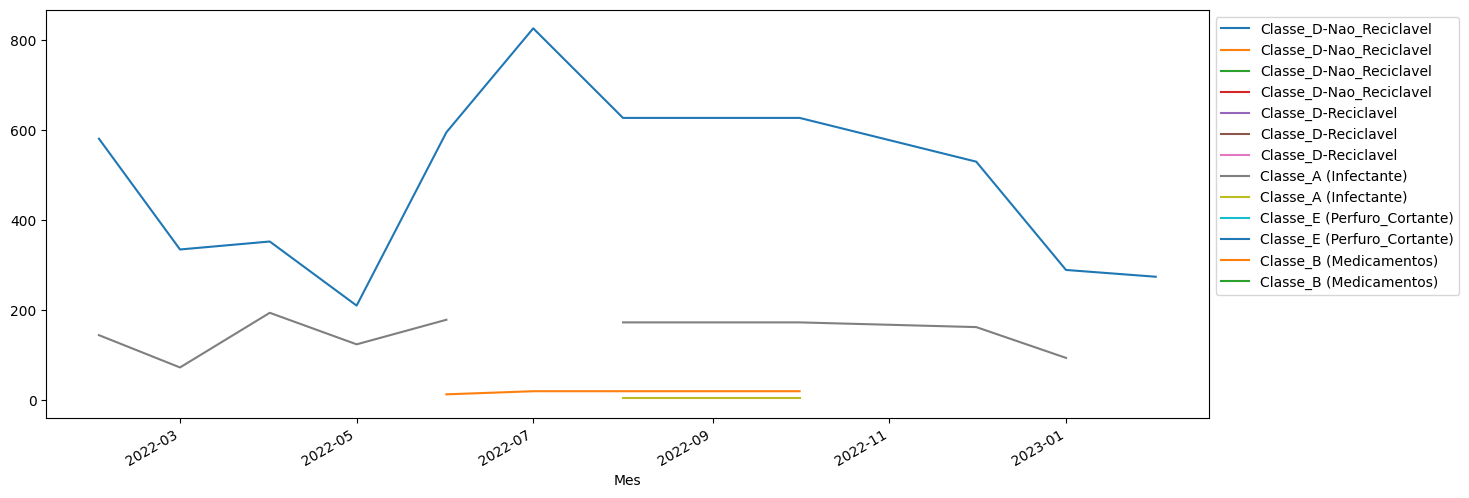

In [ ]:
last_line_month_df.plot(figsize=(15, 6)).legend(loc='upper left', bbox_to_anchor=(1,1))